In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']

pf_data = pd.DataFrame()

In [3]:
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-12-27,126.089996,3240.020020
2019-12-30,124.470001,3221.290039
2019-12-31,124.900002,3230.780029
2020-01-02,123.410004,3257.850098
2020-01-03,122.580002,3234.850098


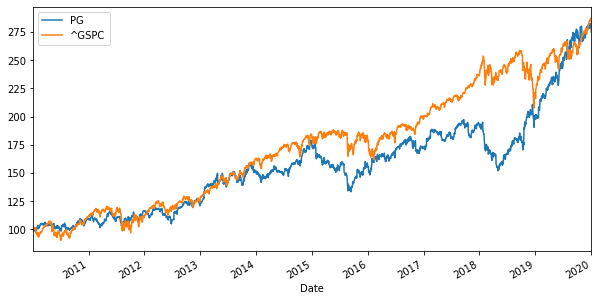

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004754,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
...,...,...
2019-12-27,0.006924,0.000034
2019-12-30,-0.012931,-0.005798
2019-12-31,0.003449,0.002942


In [8]:
log_returns.mean() * 250

PG       0.100384
^GSPC    0.104204
dtype: float64

In [9]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.021723,0.011281
^GSPC,0.011281,0.021698


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.519612
^GSPC,0.519612,1.000000


In [11]:
num_assets = len(assets)
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.57214816, 0.05258937])

In [13]:
arr[0] + arr[1]

0.6247375314418598

In [14]:
weights = np.random.random(num_assets)
weights

array([0.41145089, 0.31701095])

In [15]:
weights /= np.sum(weights)
weights

array([0.56482147, 0.43517853])

In [16]:
weights[0] + weights[1]

1.0

### Expected Portfolio Return

In [17]:
np.sum(weights * log_returns.mean()) * 250

0.10204649759701476

### Expected Portfolio Variance

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.01658524735796252

### Expected Portfolio Volatility

In [19]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.12878372318722006